In [9]:
import pandas as pd
import numpy as np
from spatialdata import SpatialData, read_zarr
import seaborn as sns
import matplotlib.pyplot as plt


# Import packages
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from spatialdata_io import visium
import os
import numpy as np
import anndata as ad
#import igraph
import leidenalg
from scipy import stats
from IPython.display import display

import json
from spatialdata import SpatialData
from spatialdata.models import Image2DModel
from spatialdata_io import visium
import spatialdata_plot

In [2]:
visium_reg = read_zarr("vis_labeled.zarr")
visium_hd = read_zarr("/home/sarah/Documents/Design_project/spotless-benchmark/proportions/visium_HD/spatial_data_obj_visium_HD/data.zarr")

/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
print(visium_reg.table.obs.columns)
print(visium_hd.tables['square_016um'].obs.columns)
print(visium_reg)

Index(['in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'spot_ind',
       'part', 'total_n_UMI_per_spot', 'n_genes_by_counts',
       'dominant_celltype_visium_cell2loc', 'dominant_celltype_visium_rctd',
       'dominant_celltype_visium_nnls',
       'dominant_celltype_visium_cell2loc_2x2',
       'dominant_celltype_visium_nnls_2x2',
       'dominant_celltype_visium_rctd_2x2', 'match_visium_rctd',
       'match_visium_cell2loc', 'match_visium_nnls', 'dominant_cell2location',
       'dominant_rCTD', 'dominant_NNLS', 'deconv_agreement',
       'cluster_cell2location', 'cluster_label', 'cluster_rCTD',
       'cluster_NNLS'],
      dtype='object')
Index(['in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'part',
       'total_n_UMI_per_spot', 'n_genes_by_counts'],
      dtype='object')
SpatialData object, with associated Zarr store: /home/sarah/Documents/Design_project/spotless-benchmark/proportions/analysis_visium_and_HD/vis_labeled.zarr
├── Images
│     ├── 'GSM5

/tmp/ipykernel_53981/2029419613.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  print(visium_reg.table.obs.columns)


## Distribution UMI counts/spot

/tmp/ipykernel_7545/1864078402.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin_plot = sns.violinplot(


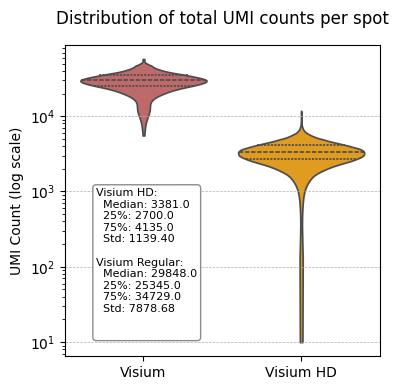

<Figure size 640x480 with 0 Axes>

In [ ]:
# Reuse the same figure with a statistics box annotation
import matplotlib.patches as patches

# Extract stats again for annotation
stats_text = ""
for name, row in stats.iterrows():
    stats_text += (
        f"{name}:\n"
        f"  Median: {row['median']}\n"
        f"  25%: {row['q1']}\n"
        f"  75%: {row['q3']}\n"
        f"  Std: {row['std']:.2f}\n\n"
    )

# Create the plot
fig, ax = plt.subplots(figsize=(4, 4))
violin_plot = sns.violinplot(
    data=df,
    x="Dataset",
    y="UMI Count",
    inner="quartile",
    cut=0,
    palette=["indianred", "orange"],
    ax=ax
)

ax.set_yscale("log")
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)
ax.xaxis.grid(False)

# Title and labels
ax.set_title("Distribution of total UMI counts per spot", fontsize=12, pad=15)
ax.set_xlabel("")
ax.set_ylabel("UMI Count (log scale)", fontsize=10)

# Add annotation box
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray')
ax.text(
    0.1,0.54, stats_text,
    transform=ax.transAxes,
    fontsize=8,
    verticalalignment='top',
    bbox=props
)

plt.tight_layout()
plt.show()

#t.savefig('violinplot_UMI_counts.png') #plt....

## Visualisation Leiden clustering

INFO     Rasterizing image for faster rendering.                                                                   


/tmp/ipykernel_53981/2016778747.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_images.render_images` in spatialdata_plot version version 0.3.0, switch to `element` instead.
  visium_reg.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="cluster_rCTD").pl.show("downscaled_hires")
/tmp/ipykernel_53981/2016778747.py:1: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  visium_reg.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="cluster_rCTD").pl.show("downscaled_hires")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10526316..1.0].
/home/sarah/anaconda3/envs/spatial_env/lib/python3.12/site-packages/spatialdata_plot/p

Text(0.5, 1.0, 'Leiden clustering on Visium data')

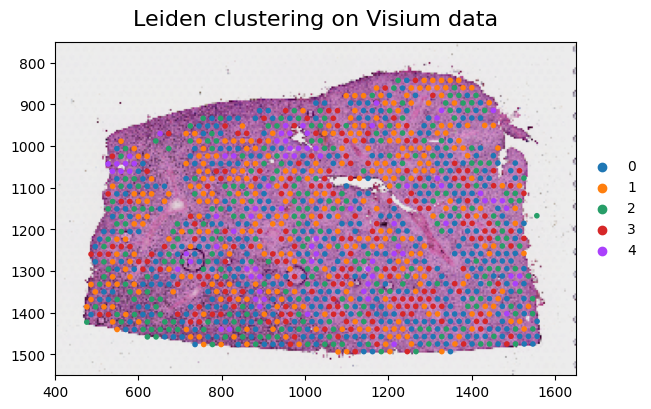

In [12]:
visium_reg.pl.render_images(elements="GSM5764414_JBO001_hires_image").pl.render_shapes(elements="GSM5764414_JBO001", color="cluster_rCTD").pl.show("downscaled_hires")
ax = plt.gca()
ax.set_xlim(400,1650)
ax.set_ylim(1550, 750) 
ax.set_title("Leiden clustering on Visium data",fontsize=16, pad=12)